In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [31]:
reeses = cv2.imread('../../DATA/reeses_puffs.png',0)

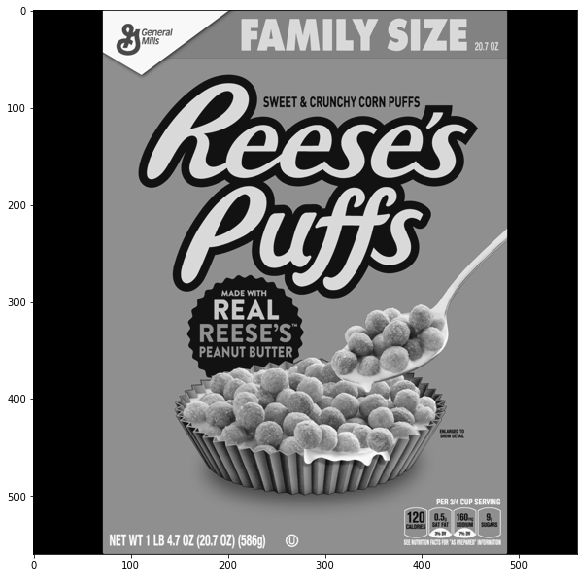

In [32]:
display(reeses)

In [33]:
cereals = cv2.imread('../../DATA/many_cereals.jpg',0)

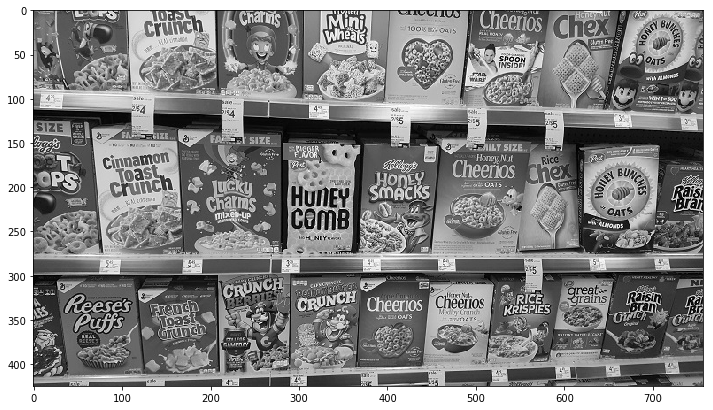

In [34]:
display(cereals)

In [35]:
orb = cv2.ORB_create()

In [36]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
#get keypoint and description of the image

In [37]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True) #creating matcher

In [38]:
matches = bf.match(des1,des2)

In [39]:
single_match = matches[0]

In [40]:
single_match.distance

78.0

In [41]:
matches = sorted(matches,key=lambda x:x.distance)

In [42]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

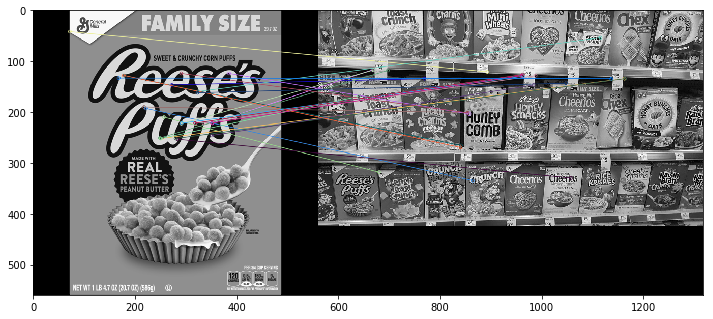

In [43]:
display(reeses_matches)

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

In [47]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [48]:
bf=cv2.BFMatcher()

In [49]:
matches = bf.knnMatch(des1,des2,k=2)

In [51]:
len(matches)

1500

In [52]:
good = []

#LESS DISTANCE  = BETTER MATCH

#RATIO MATCH < 75% MATCH 2
for match1,match2, in matches :
    #IF MATCH 1  DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE
    #THEN DESCRIPTORS  WAS GOOD  MATCH , LET KEEP IT,
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [53]:
len(good)

78

In [54]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags = 2)

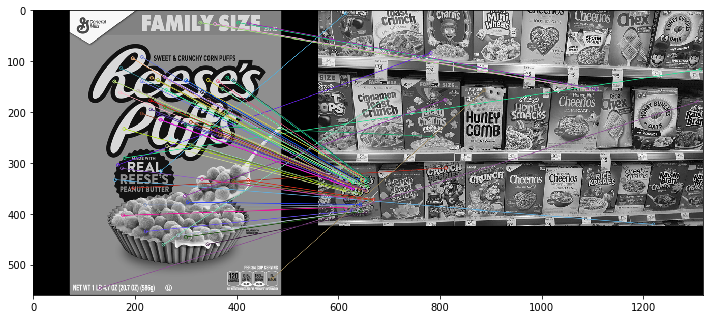

In [57]:
display(sift_matches)

In [ ]:
#FLANN

In [58]:
sift = cv2.xfeatures2d.SIFT_create()

In [59]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [60]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [61]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [62]:
matches = flann.knnMatch(des1,des2,k=2)

In [63]:
good = []

#LESS DISTANCE  = BETTER MATCH

#RATIO MATCH < 75% MATCH 2
for match1,match2, in matches :
    #IF MATCH 1  DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE
    #THEN DESCRIPTORS  WAS GOOD  MATCH , LET KEEP IT,
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [66]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

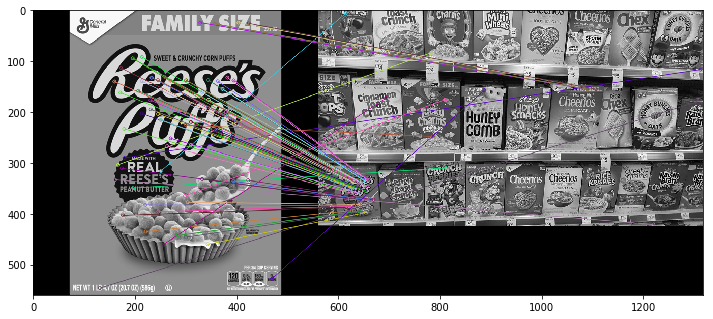

In [67]:
display(flann_matches)